In [ ]:
!git clone https://github.com/muttinenisairohith/FakeNewsDetection.git

Cloning into 'FakeNewsDetection'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), 41.01 MiB | 8.86 MiB/s, done.


In [ ]:
import pandas as pd
import csv
import numpy as np

In [ ]:
df_fake = pd.read_csv("/content/FakeNewsDetection/Data/Fake.csv.zip")
df_true = pd.read_csv("/content/FakeNewsDetection/Data/True.csv.zip")

In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake["Label"] = "Fake"
df_true["Label"] = "True"

In [ ]:
df = pd.concat([df_fake,df_true])
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head(5)

,title,text,subject,date,Label
0,"Turkish, U.S. businesses call for resolution o...",ANKARA (Reuters) - Leading Turkish and U.S. bu...,worldnews,"October 24, 2017",True
1,TRUMP HITS BACK After News of North Korea’s Nu...,President Trump made a forceful statement rega...,politics,"Aug 8, 2017",Fake
2,Boiler Room #94 – President Trump & The Great ...,Tune in to the Alternate Current Radio Network...,Middle-east,"January 27, 2017",Fake
3,Palestinian stabs Israeli in Jerusalem; anti-T...,JERUSALEM (Reuters) - A Palestinian stabbed an...,worldnews,"December 10, 2017",True
4,LOL! #VeryFakeNewsCNN Claims Anderson Cooper’s...,After Roy Moore s ugly loss in the Alabama Sen...,left-news,"Dec 13, 2017",Fake


In [ ]:
df.isnull().sum()


title      0
text       0
subject    0
date       0
Label      0
dtype: int64

Fake News Subject :  {'News': 9050, 'politics': 6841, 'left-news': 4459, 'Government News': 1570, 'US_News': 783, 'Middle-east': 778}
True News Subject :  {'politicsNews': 11272, 'worldnews': 10145}


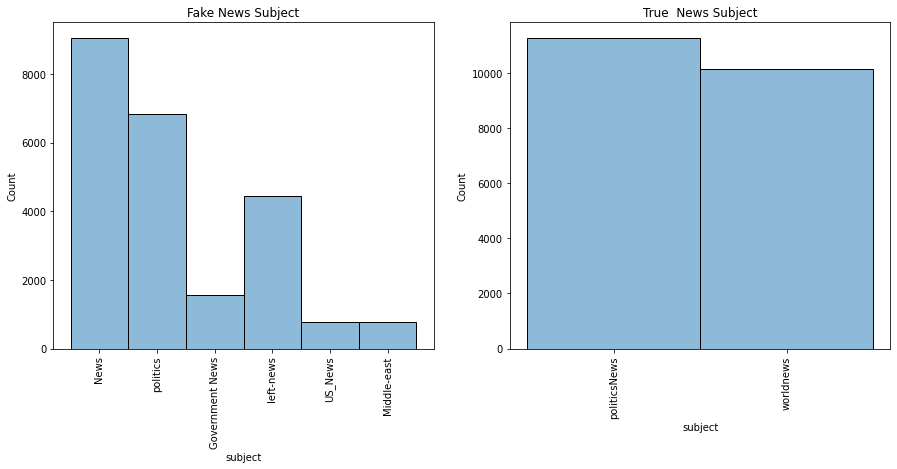

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Creating Figure
fig, axes = plt.subplots(1,2, figsize = (15,6))
#Adding the histogram1 - Fake News
sns.histplot(df_fake.subject, palette = 'Set1', alpha = 0.5, ax = axes[0])
axes[0].tick_params(axis = 'x', rotation = 90)
axes[0].set_title('Fake News Subject')
#Adding the histogram2 - True News
sns.histplot(df_true.subject, palette = 'Set1', alpha = 0.5, ax = axes[1])
axes[1].tick_params(axis = 'x', rotation = 90)
axes[1].set_title('True  News Subject')
#Printing the count of Subject
print("Fake News Subject : ",dict(df_fake.subject.value_counts()))
print("True News Subject : ",dict(df_true.subject.value_counts()))

Fake    23481
True    21417
Name: Label, dtype: int64

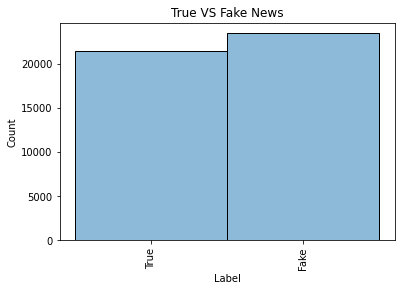

In [ ]:
sns.histplot(df.Label, palette = 'Set1', alpha = 0.5)
plt.tick_params(axis = 'x', rotation = 90)
plt.title('True VS Fake News')
df.Label.value_counts()

In [ ]:
df["text"] = df["title"]+df["text"] #considering text and title as X
X = df['text']


In [ ]:
df['Label'] = df['Label'].map({'True':1, 'Fake':0})
y = df['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 10)


In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 114.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.1 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
def tokenize(X):
    X = tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
X_train_tokens = tokenize(X_train)
X_test_tokens = tokenize(X_test)

In [ ]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from transformers import TFBertModel

In [ ]:
Length = 100
def get_model():
    dropout_rate = 0.2
    input_ids = Input(shape = (Length,), dtype = tf.int32, name = 'input_ids')
    input_mask = Input(shape = (Length,), dtype = tf.int32, name = 'input_mask')
    embeddings = bert([input_ids, input_mask])[1] #pooler output
    print(embeddings)
    out = Dropout(0.2)(embeddings)
    #64 units dense layer
    out = Dense(64,activation = 'relu')(out)
    out = Dropout(0.2)(out)
    y = Dense(1,activation = 'sigmoid')(out)
    model = Model(inputs=[input_ids, input_mask], outputs=y)
    model.layers[2].trainable = True
   #define optimizer
    optimizer = tf.keras.optimizers.legacy.Adam(lr=0.001, decay=1e-6)
    #complile the model
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')
    return model

In [ ]:
bert = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


KerasTensor(type_spec=TensorSpec(shape=(None, 768), dtype=tf.float32, name=None), name='tf_bert_model/bert/pooler/dense/Tanh:0', description="created by layer 'tf_bert_model'")


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


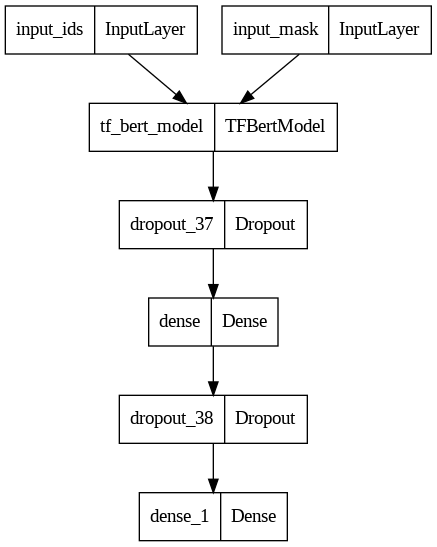

In [ ]:
model = get_model()
tf.keras.utils.plot_model(model)

In [ ]:
from keras.callbacks import EarlyStopping
history = model.fit(x = {'input_ids':X_train_tokens['input_ids'],'input_mask':X_train_tokens['attention_mask']}, y = y_train, epochs=3, validation_split = 0.2, batch_size = 64, callbacks=[EarlyStopping( monitor='val_accuracy' ,mode='max', patience=3,verbose=False,restore_best_weights=True)])

Epoch 1/3
449/449 [==============================] - 632s 1s/step - loss: 0.7006 - accuracy: 0.5197 - val_loss: 0.6929 - val_accuracy: 0.5167
Epoch 2/3
449/449 [==============================] - 614s 1s/step - loss: 0.6924 - accuracy: 0.5239 - val_loss: 0.6926 - val_accuracy: 0.5167
Epoch 3/3
449/449 [==============================] - 598s 1s/step - loss: 0.6920 - accuracy: 0.5246 - val_loss: 0.6926 - val_accuracy: 0.5167


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
yhat = np.where(model.predict({ 'input_ids' : X_test_tokens['input_ids'] , 'input_mask' : X_test_tokens['attention_mask']}) >=0.5,1,0)
print(classification_report(y_test,yhat))
print(accuracy_score(y_test,yhat))

281/281 [==============================] - 62s 211ms/step
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      4696
           1       0.00      0.00      0.00      4284

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.27      0.52      0.36      8980

0.5229398663697105


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
